Lists members of AGOL group producing a spreadsheet. Included Eauth number, Full name, Role, Email, and Last login.

1. Input group unique ID: Example - 7625ba34cbdc47cc919122a6c377ee3e
2. Input path for the spreadsheet
3. Retrieve spreadsheet at specified location

In [1]:
from arcgis.gis import GIS
gis = GIS("home")
org = GIS("home")

print("Successfully logged into AGOL")

Successfully logged into AGOL


Enter AGOL Group ID:7625ba34cbdc47cc919122a6c377ee3e
Enter folder path for spreadsheet:T:\FS\NFS\R09\Program\6800InformationManagement\GIS\Workspace\jerwin\AGOL\AGOLAdmin


<Group title:"Bat Conservation Strategy" owner:28172018111406217605844_usfs>
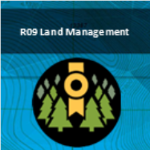

Total members in group 'Bat Conservation Strategy': 159
Group members of 'Bat Conservation Strategy' exported to T:\FS\NFS\R09\Program\6800InformationManagement\GIS\Workspace\jerwin\AGOL\AGOLAdmin\AGOLGroupMembers.xlsx


In [4]:
import os
from arcgis.gis import GIS
import pandas as pd
from datetime import datetime
from IPython.display import display

# Specify the Group ID
group_id = input("Enter AGOL Group ID:")

# Specify the directory where you want to save the file
output_directory = input("Enter folder path for spreadsheet:")
output_filename = 'AGOLGroupMembers.xlsx'

# Combine the directory and filename
output_file = os.path.join(output_directory, output_filename)

# Access the group
group = gis.groups.get(group_id)
display(group)

# Verify the group and retrieve members
if group:
    # Retrieve members using get_members() method
    members = group.get_members()
    admins = members.get('admins', [])
    users = members.get('users', [])

    # Combine all members (admins + users)
    all_usernames = admins + users
    member_count = len(all_usernames)
    
    print(f"Total members in group '{group.title}': {member_count}")

    # Initialize list to hold member details
    member_details = []

    # Fetch details for each member
    for username in all_usernames:
        user = gis.users.get(username)
        
        # Check if user object is valid
        if user:
            # Determine if user is Admin or User based on group membership
            user_role = "Admin" if username in admins else "User"

            # Collect details
            last_login = (
                datetime.utcfromtimestamp(user.lastLogin / 1000).strftime('%Y-%m-%d %H:%M:%S')
                if getattr(user, 'lastLogin', None) else "Never"
            )
            level = getattr(user, 'level', 'Unknown')
            
            #Check for email existence
            email = getattr(user, 'email', 'Not Available')

            # Append user information to member_details list
            member_details.append({"Username": user.username, "Fullname": user.fullName, "Email": email, "Group Role": user_role, "Level": level, "Last Login": last_login})

    # Create DataFrame from the member details
    df = pd.DataFrame(member_details)

    # Export to Excel
    df.to_excel(output_file, index=False)
    print(f"Group members of '{group.title}' exported to {output_file}")
else:
    print("Group not found or access is restricted.")